**What the audience should take**

Why am I doing this?

Monster Hunter
    What is it?
        Video Game about Hunting Monsters
        a series of games
    Differences between International and Japanese Releases
    
Amount of Monsters
    what do they need to know?
        Monster/New Monsters/Variant Monsters
        Difference Between Large and Small Monsters

Occurance of Monsters
    Types of Monsters

Monster Types
    Types of Monsters

Directors of Monster Hunter
    What A director of Title is

    


# Preamble

With the anticipation of Monster Hunter Rise, I wanted to take a look at the previous games in the Monster Hunter series. Monster Hunter is a series of video games made by Capcom that you play as a hunter that hunts various different and unique monsters. Large monsters act as "bosses" so the more monsters, the more potential playtime of the title. Each new installment brings new monsters, new ways to hunt the monsters and also brings older monsters from previous games. when a base version of a title is released, it followed by a sequel (known as a ultimate expansion of the base game). Ultimate expansions brings more monsters.

---

## Table of Contents
1. [**Methods**](#Methods)
    * [**Cleaning**](#Cleaning)
    * [**Amount of Monsters: Processing**](#Amount-of-Monsters:-Processing-the-Data)
    * [**Occurance of Monsters: Processing**](#Occurance-of-Monsters:-Processing-the-Data)
    * [**Monster Types: Processing**](#Monster-Types:-Processing-the-data)
    * [**Directors of Monster Hunter: Processing**](#Directors-of-Monster-Hunter:-Processing-the-data)
2. [**Analysis**](#Analysis)
    * [**Amount of Monsters: Analysis**]
    * [**Occurance of Monsters: Analysis**]
    * [**Monster Types: Analysis**]
    * [**Directors of Monster Hunter: Analysis**]

---



# Methods

### Cleaning

There are 3 csv files:

1. **Monster Classes** (Describes Monster Type and Size) [Monster_Classes.csv](Monster_Classes.csv)
2. **Title Data** (Describes Title information including release data, director) [MonsterHunter_General_Data.csv](MonsterHunter_General_Data.csv)
3. **Monster in Title** (lists all monsters in a title) [Monsters_in_Games.csv](Monsters_in_Games.csv)

I prepared that includes data such as monsters in each games, specific monster data, and title information.

Inorder to join the 3 tables together, a simular key is needed to join the tables. **Monsters in Title** Table is melted to make a 2 column table with columns ['Name','Title'] so it can be join with **Monster Classes** table on *'Name'*. The combined table is join with **Title Data** on *'Title'* to create **Monster Hunter Data** table 

most of the data was collected refering to the website [MonsterHunter.Fandom](https://monsterhunter.fandom.com/wiki/Monster_Hunter_Wiki)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src import clean_data
from src import analysis
from src import figures

from src import helpers

In [2]:
monster_hunter_data = clean_data.get_data()
monster_hunter_data

,Name,Type,Size,Title,Country Released,Date Released,Generation,Director,Console
0,Abyssal Lagiacrus,Leviathan,Large,Monster Hunter 3 Ultimate,North America,2013-03-19,3,Kaname Fujioka,3DS
1,Agnaktor,Leviathan,Large,Monster Hunter 3 Ultimate,North America,2013-03-19,3,Kaname Fujioka,3DS
2,Alatreon,Elder Dragon,Large,Monster Hunter 3 Ultimate,North America,2013-03-19,3,Kaname Fujioka,3DS
3,Altaroth,Neopteron,Small,Monster Hunter 3 Ultimate,North America,2013-03-19,3,Kaname Fujioka,3DS
4,Anteka,Herbivore,Small,Monster Hunter 3 Ultimate,North America,2013-03-19,3,Kaname Fujioka,3DS
...,...,...,...,...,...,...,...,...,...
2496,Vespoid,Neopteron,Small,Monster Hunter Freedom,North America,2006-05-23,1,Yasunori Ichinose,Playstation Portable
2497,White Monoblos,Flying Wyvern,Large,Monster Hunter Freedom,JPN,2005-12-01,1,Yasunori Ichinose,Playstation Portable
2498,White Monoblos,Flying Wyvern,Large,Monster Hunter Freedom,North America,2006-05-23,1,Yasunori Ichinose,Playstation Portable
2499,Yian Kut-Ku,Bird Wyvern,Large,Monster Hunter Freedom,JPN,2005-12-01,1,Yasunori Ichinose,Playstation Portable



### Amount of Monsters: Processing the Data

I wanted to see what how many monsters and what the proportion between new monsters to monster that were already introduced.

The analysis will be done on the following titles:

In [3]:
analysis_titles = analysis.get_amt_titles_df()
analysis_titles

,Base,Ultimate
0,Monster Hunter,Monster Hunter Freedom
1,Monster Hunter Freedom 2,Monster Hunter Freedom Unite
2,Monster Hunter 3,Monster Hunter 3 Ultimate
3,Monster Hunter Portable 3rd,NaN
4,Monster Hunter 4,Monster Hunter 4 Ultimate
5,Monster Hunter Generations,Monster Hunter Generations Ultimate
6,Monster Hunter: World,Monster Hunter World: Iceborne
7,Monster Hunter Rise,NaN


**Note:** Early in the series, the japanese titles would be released months before the western release, the western releases would also have the title name changed (ex: (Jpn) Monster Hunter X, (West) Monster Hunter Generations )

I am focusing on the western named titles, if it has one, otherwise I will be looking at the japanese named title

for each title I obtain:
1. Amount of total monsters
2. Amount of large monsters
3. Amount of small monsters
4. Amount of new monsters
5. Amount of new large monsters
6. Amount of new small monsters
7. Amount of Variant/Subspecies/Deviants

---

For all the titles

```python
title_data = monster_hunter_data[monster_hunter_data['Title'] == title]
```

To find [ 1 ]  I filtered for the title, removed any duplicate monster names, and counted the rows

```python
title_monsters = title_data.drop_duplicates(subset=['Name']).count()
```

Similary to [ 1 ] to find [ 2 / 3 ] group by the size and count the rows

```python
large_monsters = total_monsters.groupby('Size').count().Large
small_monsters = total_monsters.groupby('Size').count().Small
```

In order to find [ 4 ] the new monsters in the title needs to be found, the title date is used to filter for previous titles. The minimum title date is taken the japanese release and the reason it is used instead of the western release is to ensure we dont get the japanese title in the filtering.

```python
title_date = min(title_data['Date Released'])
```

a list of monsters from the title and a list of monsters from all previous titles are found. the new monsters are found by taking the set difference of the previous monsters and the title monsters.

```python
previous_monsters = title_data[title_data['Date Released'] < title_date].drop_duplicates(subset=['Name'])
```

```python
new_monsters = title_monsters[title_monsters['Name'].isin(previous_monsters) == False].count()
```

The [ 5 / 6 ] is just a groupby on 'Size'

```python
new_large_monsters = new_monsters.groupby('Size').count().Large 
new_small_monsters = new_monsters.groupby('Size').count().Small

```

[ 7 ] The variants (which are generalization of subspecies/deviants/apex(Rise)) are retrieved finding the non-variant monsters by sorting a list of all the monsters names by string length and then iterating through the list from 1-n removing any that contains the shorter names which produces a list of non variant monsters. to get the variants we takes the difference of titles monsters and the non-variant title monsters.

```python
variant_count = monsters_in_title[monsters_in_title['Size'] == 'Large']['Name'].count() - len(
            helpers.filter_out_variants(monsters_in_title[monsters_in_title['Size'] == 'Large']))
```

see the [filter_out_variants(df)](helpers.py) if interested

In [4]:
amt_monsters_df = analysis.get_amt_table(analysis_titles,monster_hunter_data)


---

### Occurance of Monsters: Processing the Data

How many times have monsters appeared in the titles through the years? I will look at the monsters in the ```analysis_titles```. I want to show the monster that has shown up the most of each type of monster. 

```python
monster_occurance_data = monster_hunter_data[monster_hunter_data['Title'].isin(analysis_titles) == True]
```
a list of occurances of each monster and their type is produced
```python
monster_occurance_data = monster_occurance_data.groupby(['Name', 'Type'])['Title'].count()
```
```monster_occurance_data``` has now 3 columns 'Name', 'Type','Occurance', where occurance is the amount of times it is in the analysis titles. To find the monster and types that has been in most titles, I get the max occurances by grouping by 'Type' and using the max aggregate.
```python
max_occ_monster_type = monster_occurance_data.groupby('Type')['Title'].max()
```
joining ```max_occ_monster_type``` and ```monster_occurance_data``` on 'Type' to produce ```most_occurances```. The join add the column 'Max Occurance' that contains the highest number of occurances of the given type of monster. To create the final table I filter the table where occurance is equal to the max occurance of the monster type.
```python
most_occurances = most_occurances[most_occurances['Occurance'] == most_occurances['Max_Occurance']]
```

In [5]:
most_occurances = analysis.get_monster_occurance_df(analysis_titles,monster_hunter_data)


---

### Base vs. Ultimate: Processing the data

What is the difference between a base game and an ultimate release? 

for the analysis, I want to see how much time does it take between the base and ultimate versions and how much more monsters are added to the ultimate release.

I choose to use the japanese titles release dates because they have the earliest release dates.

In [6]:
game_titles = analysis.get_base_ultimate_titles()
game_titles

,Base,Ultimate
0,Monster Hunter,Monster Hunter G
1,Monster Hunter Portable 2nd,Monster Hunter Portable 2nd G
2,Monster Hunter 3,Monster Hunter 3 G
3,Monster Hunter 4,Monster Hunter 4 G
4,Monster Hunter X,Monster Hunter XX
5,Monster Hunter: World,Monster Hunter World: Iceborne


*note: Monster Hunter:Portable 3g and Monster Hunter:Rise are excluded because they do not have ultimate releases* 

The ```game_title_data``` table is made by filtering for ```game_titles```, titles are sorted by 'Release date' and any duplicate titles are dropped.

2 more tables are created by joining the respective column from ```game_titles``` to ```game_title_data``` to create ```base_titles``` and ```ultimate_titles```
```python
base_titles = pd.merge(game_title_data, game_titles, left_on='Title', right_on="Base", how='right').dropna()[
        ['Title', 'Date Released']]
```
```python
ultimate_titles = pd.merge(game_title_data, game_titles, left_on='Title', right_on="Ultimate", how='right').dropna()[
        ['Title', 'Date Released']]
```
a 'Large Monster' coolums is added to both ```base_titles``` and ```ultimate_titles``` by applying a function to get the large monster in the titles
```python
lambda title: len( mh_data[mh_data['Title'] == title) & (mh_data['Size'] == 'Large')]['Name'].unique() )
```
The tables ```base_titles```, ```ultimate_titles``` are joined on index that relates base game to ultimate version to create ```bu_game_date_data```. The columns 'Date Difference' and 'Large Monster Difference' are added by computing the difference of the ultimate date and large monsters by base date and large monsters
```python
bu_game_date_data['date_difference'] = abs(bu_game_date_data['Date Released Ultimate'] - 
                                        bu_game_date_data['Date Released Base'])
```
```python
bu_game_date_data['monster_difference'] = abs(bu_game_date_data['Large Monsters Ultimate'] - 
                                           bu_game_date_data['Large Monsters Base'])
```

In [7]:
bu_game_date_data = analysis.get_base_ultimate_df(game_titles, monster_hunter_data)


---

### Monster Types: Processing the data

Monster Hunter has a lot of monsters in the series, and each monster belongs to a family type. I want to see what the distribution of the types are and when each type was introduced.

To get the monsters throughout the titles, duplicate monster names are dropped from ```monster_hunter_data``` and a counting the rows of each type is done

```python
monster_type_data = monster_hunter_data.drop_duplicates(subset=['Name']).groupby('Type').count()
```

to find out when each type was introduced, I sort the date released by ascending order and drop duplicate released date (keeping the first date) to make ```monster_type_intro_date```.
```python
monster_type_intro_date = monster_hunter_data.sort_values(by='Date Released').drop_duplicates(
                                                                               subset=['Type'],keep='first')
```

---

In [8]:
monster_type_data,monster_type_intro_date = analysis.get_types_df(monster_hunter_data)


### Directors of Monster Hunter: Processing the data

this might be a stretch but I wanted to look into monsters each director has released and se if the director favor monster they have introduced into the franchise.

inorder to find each directors monsters I sorded ```monster_hunter_data``` by 'Date Released' and dropped and duplicate monster names (keeping the first occurance) creating ```director_data```. 
```python
director_data = monster_hunter_data.sort_values(by=['Date Released']).drop_duplicates(subset=['Name'], keep='first')
```
Filtering for each director, **Kaname Fujioka**, **Yasunori Ichinose**, and **Yuya Tokuda**.
```python
fujioka_titles = director_data[director_data['Director'] == 'Kaname Fujioka'][
        ['Title', 'Date Released', 'Director']].drop_duplicates(subset=['Title'],keep='first')
```
I create a list of the directors monsters by using ```director_data``` and filtering for the director and projecting ['Name','Title']
```python
fujioka_monsters = director_data[director_data['Director'] == 'Kaname Fujioka'][['Name', 'Title']]
```
I add 2 additional columns to ```fujioka_titles```, ['Total Monsters','Director Monsters'] by apply 2 functions to the dataframe
```python
# For Total Monsters
lambda title: monster_hunter_data[monster_hunter_data['Title'] == title]['Name'].drop_duplicates().count())

# For Director Monsters
lambda title: monster_hunter_data[(monster_hunter_data['Title'] == title) &
 (monster_hunter_data['Name'].isin(fujioka_monsters['Name']) == True)]['Name'].drop_duplicates().count())
```

I combine the ```fujioka_titles```, ```ichinose_titles```, ```tokuda_titles``` to create ```director_title_data``` and an additional dataframe to made to that has columns ['Director','Titles','Total Director Monsters'].

---

In [9]:
director_title_data,director_data = analysis.get_director_df(monster_hunter_data)
director_title_data.groupby(by='Director')['Director Monster Ratio'].mean().to_frame('Mean').reset_index()

,Director,Mean
0,Kaname Fujioka,0.928926
1,Yasunori Ichinose,0.256197
2,Yuya Tokuda,0.602049



---

# Amount of Monsters: Analysis

using ```amt_monsters_df``` produces 'Amount of Moonster in Mainliine Series' figure.

In [10]:
amt_monsters_df[['Title','Total Monsters', 'Large Monsters','Small Monsters',
                      'New Monsters', 'New Large Monsters', 'New Small Monsters','Variant Monsters']]
m_value = amt_monsters_df['New Monster Ratio'].mean()
amt_monsters_df['Difference Mean'] = abs( amt_monsters_df['New Monster Ratio'] - m_value )

threshold_u = m_value + 0.1
threshold_l = m_value - 0.1
print(m_value)
amt_monsters_df[(amt_monsters_df['Difference Mean'] < threshold_u) & (amt_monsters_df['Difference Mean'] > threshold_l)]

0.391275807656466


,index,Title,Release Date,Total Monsters,Large Monsters,Small Monsters,New Monsters,New Large Monsters,New Small Monsters,Variant Monsters,New Monster Ratio,Variant Monster Ratio,Difference Mean
4,0,Monster Hunter 3,2009-08-01,35,19,16,26,16,10,0,0.842105,0,0.450829
10,0,Monster Hunter Generations Ultimate,2017-08-25,129,94,35,8,8,0,25,0.0851064,0.265957,0.306169


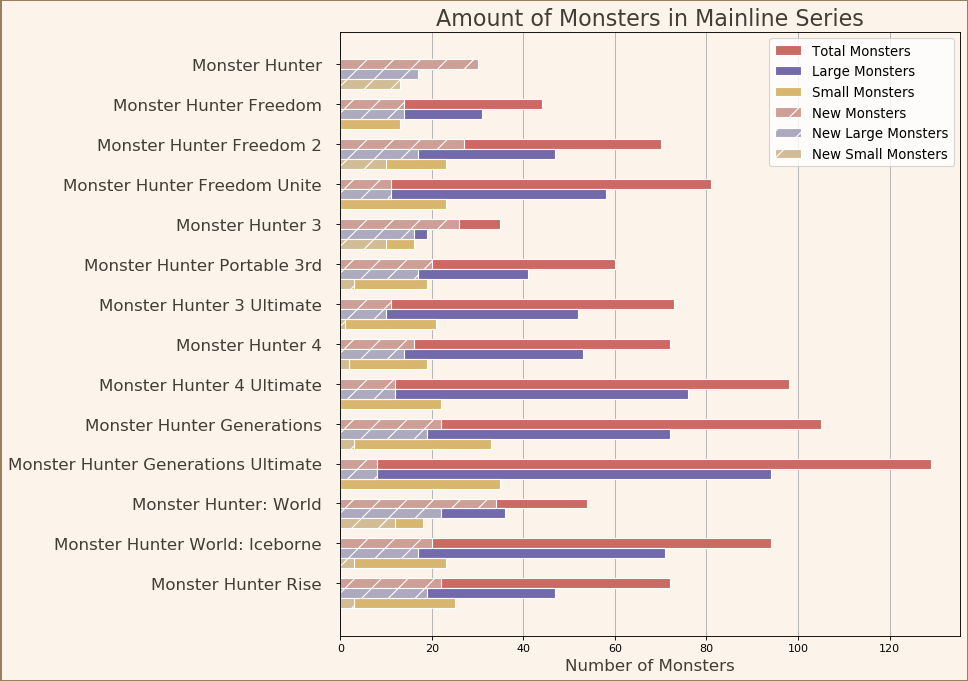

In [11]:
figures.make_amt_monsters_figure(amt_monsters_df)

The trends in the ratio of new monsters to total seems consisent over the series with the exception of Monster Hunter, Monster Hunter 3, and Monster Hunter Generations Ultimate. Monster Hunter is the first game and Monster Hunter Generations Ultimate was a title that the wanted to bring back monsters from the previous games which explains the high to low ratios. Monster Hunter 3 has a low total monsters but a high ratio of new monsters. 

In [12]:
director_data = monster_hunter_data.sort_values(by=['Date Released']).drop_duplicates(subset=['Name'], keep='first')
director_data[director_data['Director'] == 'Kaname Fujioka'][
        ['Title', 'Date Released', 'Director']].drop_duplicates(subset=['Title'],keep='first')

fujioka_monsters = director_data[director_data['Director'] == 'Kaname Fujioka'][['Name', 'Title']]
fujioka_monsters 

,Name,Title
2327,Rathian,Monster Hunter
2333,Vespoid,Monster Hunter
2297,Genprey,Monster Hunter
2331,Velociprey,Monster Hunter
2329,Velocidrome,Monster Hunter
...,...,...
1479,Berserk Tetsucabra,Monster Hunter 4 G
1476,Ash Kecha Wacha,Monster Hunter 4 G
1508,Gogmazios,Monster Hunter 4 G
1498,Desert Seltas Queen,Monster Hunter 4 G


In [13]:
print('Mean of New Monster Ratio {:2.5f} '.format(amt_monsters_df['New Monster Ratio'].mean()))
print('Median of New Monster Ratio: {:2.5f}'.format(amt_monsters_df['New Monster Ratio'].median()))
print('\nMean of Variant Monster Ratio: {:2.5f}'.format(amt_monsters_df['Variant Monster Ratio'].mean()))
print('Median of Variant Monster Ratio: {:2.5f}'.format(amt_monsters_df['Variant Monster Ratio'].median()))

Mean of New Monster Ratio 0.39128 
Median of New Monster Ratio: 0.31293

Mean of Variant Monster Ratio: 0.25573
Median of Variant Monster Ratio: 0.29372



# Monsters Throughout the Series

We will be analyzing the same titles as the amount of monsters.

The monsters with the most occurances throughout the series is **Rathalos** and **Rathian** which have shown up in all analysis titles.

Rathalos  | Rathian
:-------------------------:|:----------------------:
![Rathalo](Resources/MHRise-Rathalos_Render_003.png) | ![Rathian](Resources/Rathian_Transparent01.png)

*Images from MonsterHunter.fandom*



# Base Vs Ultimate?

Another question is how many months between a base game and the ultimate release. with the ultimate realease, it brings more monsters and more things to do!  

To find the amount of months between the version, I will use the japan release titles, the reason is titles were released in japan monsths before coming to the west.  

In [14]:
game_titles = analysis.get_base_ultimate_titles()
base_ultimate = analysis.get_base_ultimate_df(game_titles, monster_hunter_data)
print('Mean of time between games {:2.5f} months'.format(base_ultimate['Date Difference'].mean().days/30.5))
print('Median of time between games {:2.5f} months'.format(base_ultimate['Date Difference'].median().days/30.5))
base_ultimate

Mean of time between games 16.55738 months
Median of time between games 14.32787 months


,Title Base,Date Released Base,Large Monsters Base,Variant Monsters Base,Title Ultimate,Date Released Ultimate,Large Monsters Ultimate,Variant Monsters Ultimate,Date Difference,Monster Difference,Variant Monster Difference
0,Monster Hunter,2004-03-11,17,0,Monster Hunter G,2005-01-20,28,9,315 days,11,9
1,Monster Hunter Portable 2nd,2007-02-22,47,15,Monster Hunter Portable 2nd G,2008-03-27,58,20,399 days,11,5
2,Monster Hunter 3,2009-08-01,19,0,Monster Hunter 3 G,2011-12-10,52,21,861 days,33,21
3,Monster Hunter 4,2013-09-14,53,18,Monster Hunter 4 G,2014-10-11,76,33,392 days,23,15
4,Monster Hunter X,2015-11-28,72,16,Monster Hunter XX,2017-03-18,94,25,476 days,22,9
5,Monster Hunter: World,2018-01-26,36,4,Monster Hunter World: Iceborne,2019-09-06,71,23,588 days,35,19



# When will Rise Ultimate Release?!?

we can hope that it will be released in 14-15 months on 

In [15]:
# figures.make_base_ultimate_figure(bu_game_date_data)

KeyError: 'monster_difference'

In [ ]:
mh_data = monster_hunter_data
game_titles_lst = game_titles['Base'].append(game_titles['Ultimate']).dropna()
game_title_data = mh_data[mh_data['Title'].isin(game_titles_lst) == True]
game_title_data = game_title_data[['Title', 'Date Released']].sort_values(by=['Date Released']).drop_duplicates(
    subset=['Title'], keep='first')
# make 2 tables, Base games and Ultimate games
base = pd.merge(game_title_data, game_titles, left_on='Title', right_on="Base", how='right').dropna()[
    ['Title', 'Date Released']]
ultimate = pd.merge(game_title_data, game_titles, left_on='Title', right_on="Ultimate", how='left').dropna()[
    ['Title', 'Date Released']]
base = base.reset_index(drop=True).reset_index()
ultimate = ultimate.reset_index(drop=True).reset_index()
# add 'Large Monster' column to each table
base['Large Monsters'] = base['Title'].apply(lambda title:
                                             len(mh_data[
                                                     (mh_data['Title'] == title) & (mh_data['Size'] == 'Large')][
                                                     'Name'].unique()))
base['Variant Monsters'] = base['Title'].apply(lambda title:
                                             len(mh_data[
                                                     (mh_data['Title'] == title) & (mh_data['Size'] == 'Large')][
                                                     'Name'].unique()) - len(helpers.filter_out_variants(
                                                    mh_data[ (mh_data['Title'] == title) & (mh_data['Size'] == 'Large') ].drop_duplicates(subset='Name') )))

ultimate['Large Monsters'] = ultimate['Title'].apply(lambda title:
                                                     len(mh_data[(mh_data['Title'] == title) & (
                                                                 mh_data['Size'] == 'Large')]['Name'].unique()))
ultimate['Variant Monsters'] = ultimate['Title'].apply(lambda title:
                                             len(mh_data[
                                                     (mh_data['Title'] == title) & (mh_data['Size'] == 'Large')][
                                                     'Name'].unique()) - len(helpers.filter_out_variants(
                                                    mh_data[ (mh_data['Title'] == title) & (mh_data['Size'] == 'Large') ].drop_duplicates(subset='Name') )))
# combine tables
game_date_data = pd.merge(base, ultimate, on='index', suffixes=(' Base', ' Ultimate'))
# compute date and monster differences
game_date_data['Date Difference'] = abs(
    game_date_data['Date Released Ultimate'] - game_date_data['Date Released Base'])
game_date_data['Monster Difference'] = abs(
game_date_data['Large Monsters Ultimate'] - game_date_data['Large Monsters Base'])
game_date_data['Variant Monster Difference'] = abs(
game_date_data['Variant Monsters Ultimate'] - game_date_data['Variant Monsters Base'])
game_date_data.drop('index',axis=1)

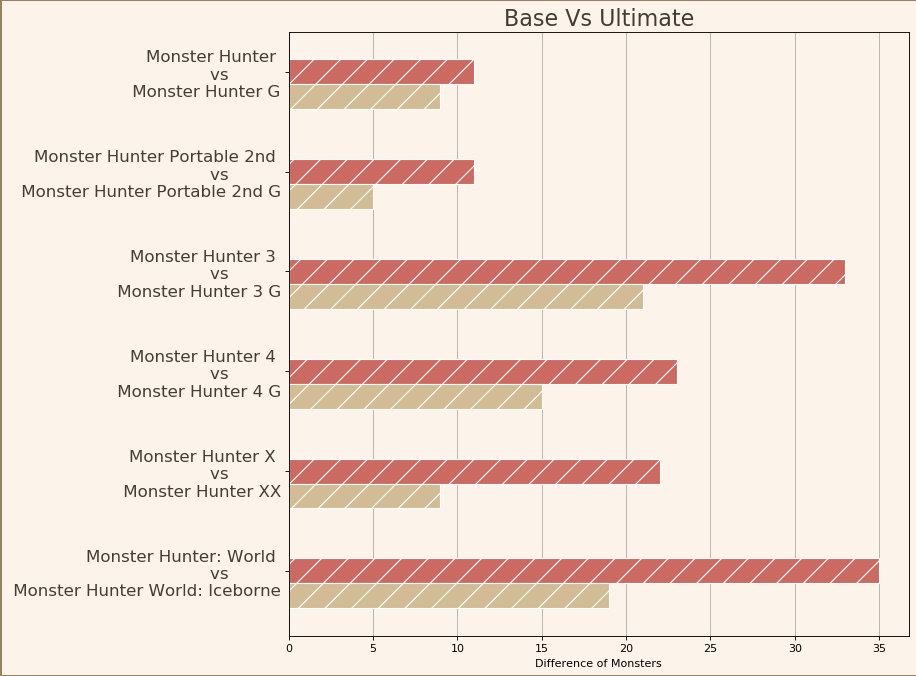

In [23]:

labels = ['Monster Hunter \nvs          \n Monster Hunter G',
          'Monster Hunter Portable 2nd \nvs          \n Monster Hunter Portable 2nd G',
          'Monster Hunter 3 \nvs          \n Monster Hunter 3 G',
          'Monster Hunter 4 \nvs          \n Monster Hunter 4 G',
          'Monster Hunter X \nvs          \n Monster Hunter XX',
          'Monster Hunter: World \nvs          \n Monster Hunter World: Iceborne']
monsters_diff = base_ultimate['Monster Difference']
var_monster_diff = base_ultimate['Variant Monster Difference']
fig, ax = plt.subplots(figsize=(10, 10), dpi=80)
ax.grid(axis='x', zorder=0)
width = 0.25
rects1 = np.arange(len(labels))
rects2 = [x + width for x in rects1]
ax.barh(rects1, monsters_diff, height=width, edgecolor='white', label='Total Monsters', color='#cb6a63', hatch='/',zorder=2)
ax.barh(rects2, var_monster_diff, height=width, edgecolor='white', label='Total Monsters', color='#d2bc96', hatch='/',zorder=2)
ax.set_yticks(rects1)
ax.set_yticklabels(labels, fontsize='15', color='#423e35')
ax.invert_yaxis()
ax.set_title('Base Vs Ultimate', color='#423e35', fontsize='20')
ax.set_xlabel('Difference of Monsters')
ax.set_facecolor('#fcf3ea')
fig.set_facecolor('#fcf3ea')
fig.set_edgecolor(color='#98805c')
fig.patch.set_linewidth('1')
fig.savefig('Figures/base_vs_ultimate.png',
            facecolor=fig.get_facecolor(),
            edgecolor=fig.get_edgecolor(),
            bbox_inches="tight")


### Sorting monsters to Directors
I want to find if a director is more likely to use monsters that they have introduced
I want to get the data to have the relavant titles
total_new_monsters

In [ ]:
figures.make_director_figure(director_title_data)

In [ ]:
figures.make_type_figure(monster_type_data)